In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
my_model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [8]:
Labels = []
file_name = 'obj.txt'
with open(file_name,'rt') as fpt:
    Labels = fpt.read().rstrip('\n').split('\n')

In [9]:
print(Labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [10]:
print(len(Labels))

80


In [11]:
my_model.setInputSize(320,320)
my_model.setInputScale(1.0/127.5)
my_model.setInputMean((127.5,127.5,127.5))
my_model.setInputSwapRB(True)

<dnn_Model 00000287B4E2C490>

In [12]:
img = cv2.imread('sample0.jpg')

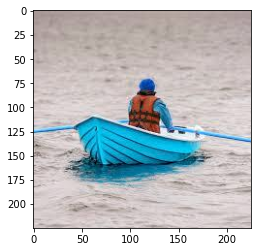

In [13]:
plt.imshow(img)

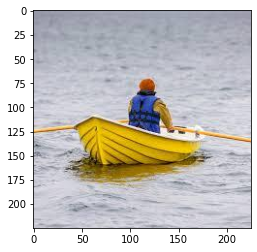

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
ClassIndex, confidece, bbox = my_model.detect(img,confThreshold=0.5)

In [16]:
print(ClassIndex)

[1 9]


In [17]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),1)
    cv2.putText(img,Labels[ClassInd-1],(boxes[0]+0,boxes[1]+40),font,fontScale=font_scale,color=(0,0,255),thickness=3)

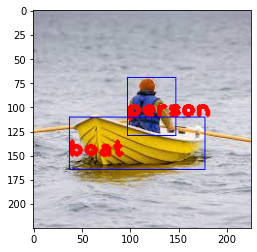

In [18]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))